# Ensemble Learning - Bagging

# Theory

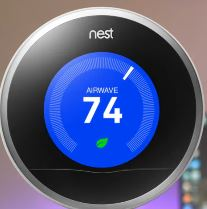

An Example:

Once Mr.Dhaval wanted to buy a nest thermostat and he was not sure to buy that or not, he then called 4 of his friends who already have that device and he asked for an opinion, 3 of them told that he should buy it and one told that no dont buy it and then Mr.Dhaval took a majority vote and he went ahead and bought it.

We use ensemble learning in our real life where to make a decision we take opinion from different people, similarly in ML sometimes what happens is if we have just one model and if we train that model  using all the dataset that model might get overfit or it might suffer from a high variance problem, we can tackle this high variance problem by using ensemble learning.

In case of thermostate, Mr.Dhaval called 4 friends instead of 1 because if there is 1 person then that person can be biased so he wanted to make a good decision so he took opinion from multiple people and similarly in ensemble we train multiple models on a same dataset and when we do prediction on multiple models and then whatever output we get we combine that result somehow to get the final outcome.

**Techniques in Ensemble**
1. Bagging
2. Boosting

These are the 2 main techniques used in ensemble learning.

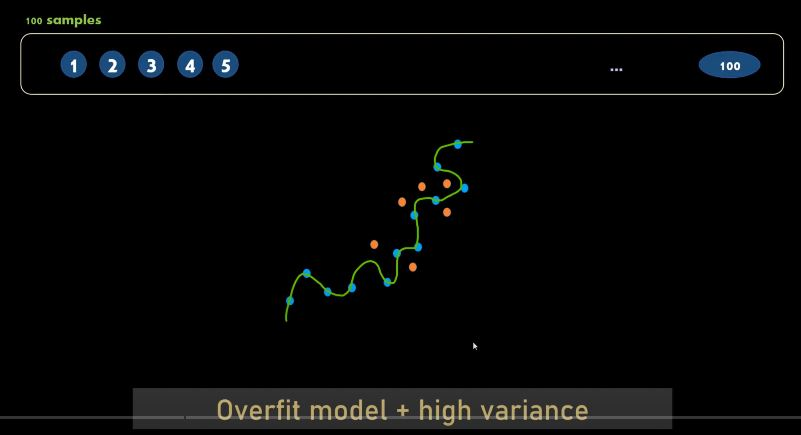

Lets assume we have this dataset of 100 samples and when we train an ML model, one of the problem we might encounter is overfitting and it happens due to the nature of the dataset or ML methadology etc. and usually overfitting model has a problem of high variance. To tackle this problem, one of the things that we can do is out of 100 samples, create a small dataset of 70 samples:

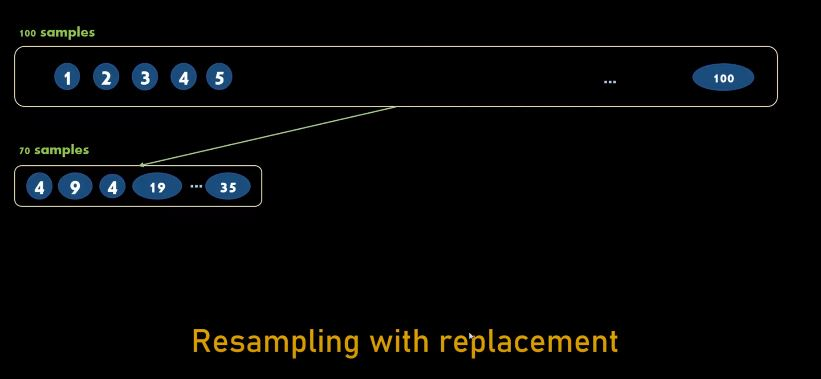

The way we create this subset is by using resampling  with replacement, what is that exactly?

To understand it lets say we have this 10 samples:

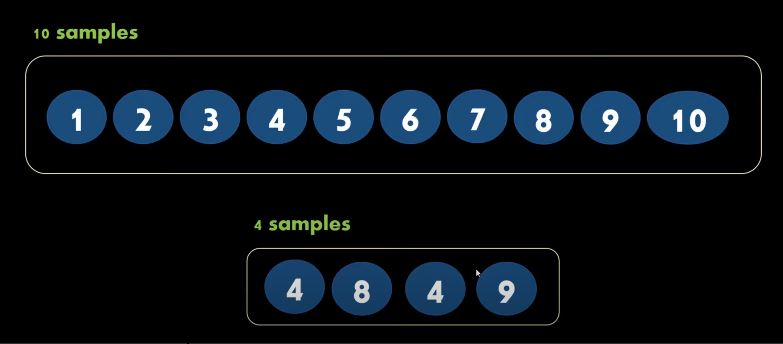

Out of which we want to create a smaller dataset with four samples. In resampling with replacement, we randomly pick any datapoint lets say 4 and then we go and pick second data point we again randomly pick any datapoint from 1 to 10 with equal probability, we dont look at what we already have in our subset so second times lets say we get 8, and third time also we randomly pick any  data point from 1 to 10 and this time we might get the same sample again which is 4, so this is resampling with replacement where in our subset we can get same data sample for multiple times.

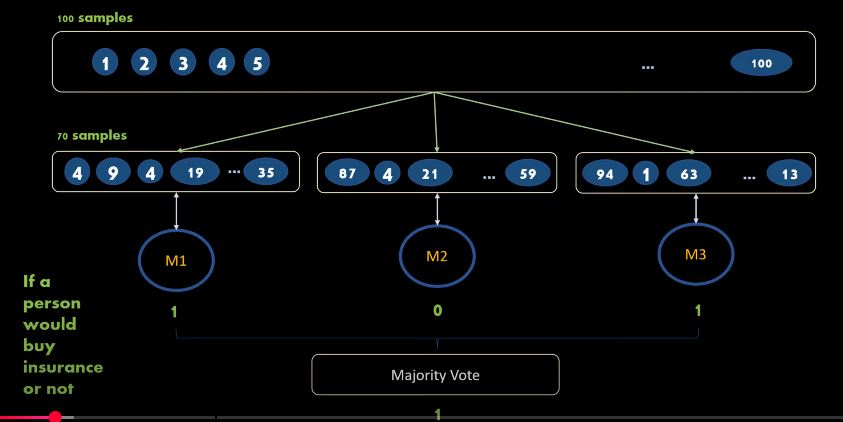

So here from our original dataset we created  subset of 70 samples, we might create n number of smaller datasets from the original dataset using resampling with replacement and then on individual dataset we can train our machine learning model, lets assume we trying to classify if a person should buy insurance or not and we are using logistic regression, so we will use logistic regression model, so here  M1,M2,M3 they are all logistic regression but they are trained on a different dataset and when they are trained and now we have to perform the prediction or inference, we will perform that prediction on all three models in parallel individually and whatever result we get, we get majority of vote. So here M1 and M3 saying person should buy insurance and M2 saying they should not. Majority vote is clearly won and that is the final outcome. The benefit here is these individual models are weak learners. Weak learner means, they are trained on a subset of dataset and hence they will not overfit, it is likely that they will generalize better and they will not overfit and these individual weak learners when you combine the result then we get overall a good result. This was a case of classification, same thing applies for regression:

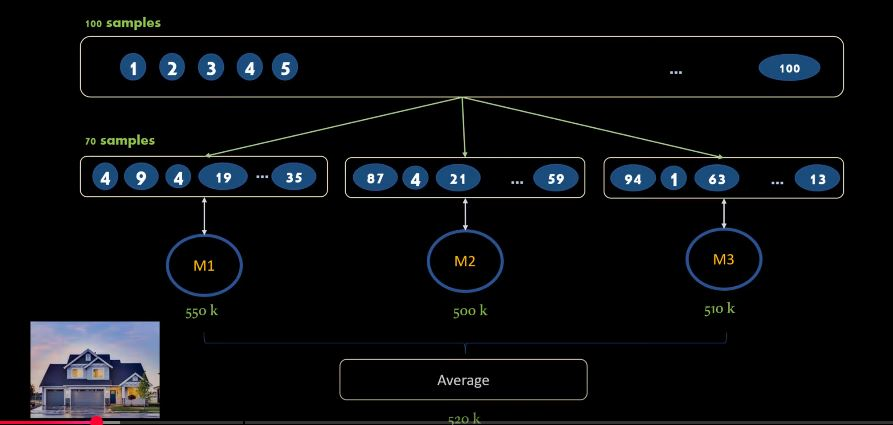

Lets assume we are doing house price prediction, here we take an average of whatever is the prediction by individual model.

This technique is also called Bootstrap aggregation as shown:

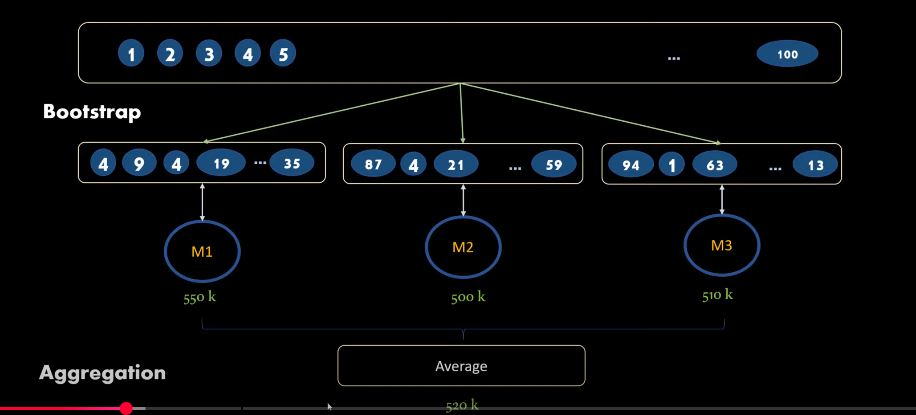

It is called bootstrap aggregation because when we are creating this small subset of dataset i-e like 19 using resampling with replacement that procedure is called **Bootsrap** and when we combine their result using either an average or majority vote that is called **Aggregation**.

So hence bagging is called Bootstrap aggregation. Many times we hear all these terms and jargons and get worried what it is, but these concepts are very easy.

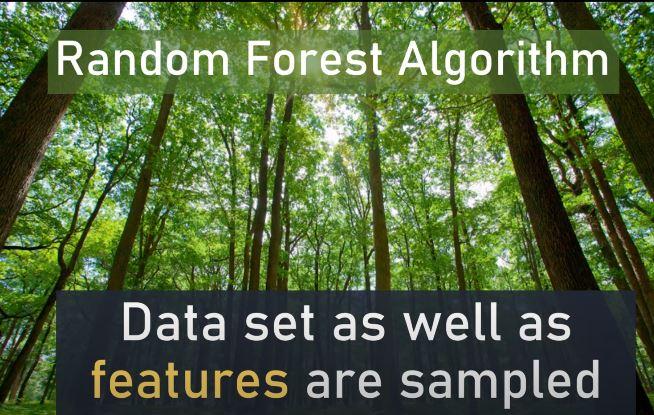

Now random forest is one of the bagging technique with only one distinction which is we not only sample the datarows but also sample the features, so basically we sample the rows as well as the columns.

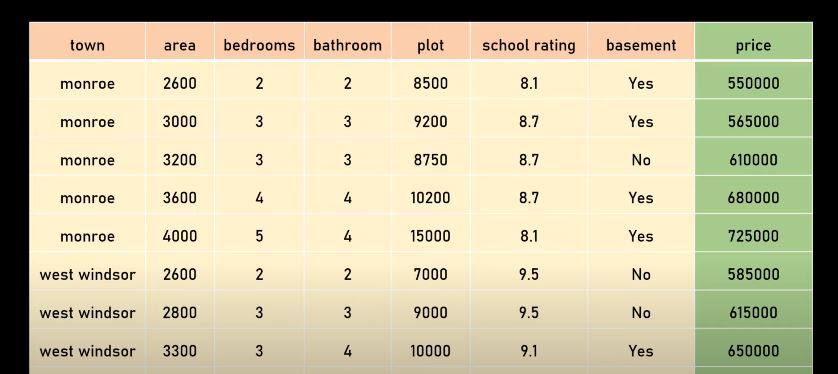

Lets look at the classical house price prediction example where town,area,bedroom, etc. are features and pricing which is a green column is the target variable.

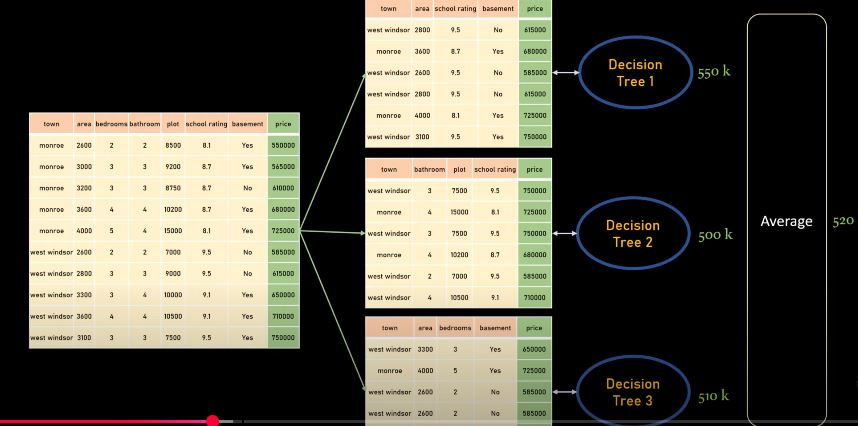

Here we will sample rows and columns both so here we can see, we dont have a bedroom column or a plot column, we randomly resample out of 1,2,3,4 so out of 7  columns, we got only 4 columns. In the second time again we randomly sample this column, so we did not get for example bedrooms in this particular dataset. and the 3rd one for example here we didnot get school rating. So we are resampling and randomly picking rows as well as columns then on individual dataset we train a decision tree model and then we aggregate the results, here we have decision tree regression and we can use it for classification problem as well. The point is very simple, random trees basically is a bagging technique but here we do one additional thing which is we randomly pick features as well.

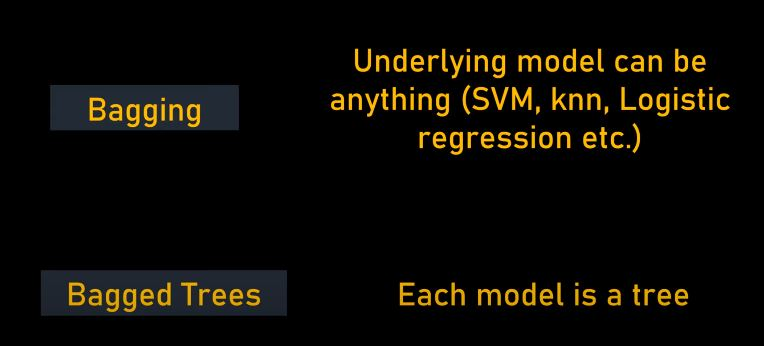

And the difference between these terms bagging and bagged trees is that, in bagging individual models can be SVM or KNN or logistic regression or any model whereas in bagged trees, so the random forest is the bagged tree example. Here every model that we are training is a tree

# Coding

In [2]:
import pandas as pd

df = pd.read_csv('20_diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
# DATA Exploration
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [8]:
268/500

0.536

In [9]:
x = df.drop('Outcome',axis='columns')
y = df.Outcome

In [10]:
# Scalling

In [12]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)
x_scaled[:3]

array([[ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
         0.20401277,  0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575,  0.53090156, -0.69289057,
        -0.68442195, -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, -1.28821221, -0.69289057,
        -1.10325546,  0.60439732, -0.10558415]])

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, stratify=y, random_state=10)

In [16]:
X_train.shape

(576, 8)

In [17]:
X_test.shape

(192, 8)

In [18]:
y_train.value_counts()

Outcome
0    375
1    201
Name: count, dtype: int64

In [20]:
201/375

0.536

In [22]:
x.shape

(768, 8)

In [24]:
# Decision tree is relatively imbalance classifier, it can overfit and might generate high variance model

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

score = cross_val_score(DecisionTreeClassifier(), x, y, cv=5) # this cv here will divide the upper x.shape value which is 768 into 5 folds
score

array([0.68831169, 0.66883117, 0.7012987 , 0.81699346, 0.70588235])

In [25]:
score.mean()

np.float64(0.7162634750870046)

In [26]:
# Baggig classifier

In [30]:
from sklearn.ensemble import BaggingClassifier

bag_model = BaggingClassifier(
    estimator = DecisionTreeClassifier(),
    n_estimators = 100, # these are M1,M2,M3 in theory section
    max_samples=0.8,
    oob_score=True, # it means Out of bag
    random_state=0
)

bag_model.fit(X_train, y_train)
bag_model.oob_score_

0.7534722222222222

In [32]:
bag_model.score(X_test, y_test)

0.7760416666666666

In [43]:
bag_model = BaggingClassifier(
    estimator = DecisionTreeClassifier(),
    n_estimators = 100, # these are M1,M2,M3 in theory section
    max_samples=0.8,
    oob_score=True, # it means Out of bag
    random_state=0
)

cross_val_score(bag_model, x, y, cv=5)
score.mean()

np.float64(0.7162634750870046)

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
scores = cross_val_score(RandomForestClassifier(),x,y,cv=5)
scores.mean()

np.float64(0.7761310584839997)